<a href="https://colab.research.google.com/github/poojan14/MNIST/blob/master/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop

In [0]:
(mnist_train_images, mnist_train_labels), (mnist_test_images,mnist_test_labels)= mnist.load_data()

In [0]:
from keras import backend as K
if K.image_data_format()=='channels_first':
  train_images=mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
  test_images=mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
  input_shape=(28,28,1)
else:
  train_images=mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
  test_images=mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
  input_shape=(28,28,1)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images /=255
test_images /=255

In [0]:
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


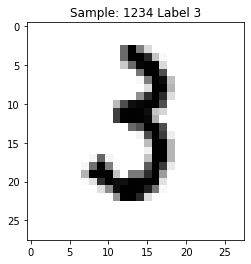

In [0]:
import matplotlib.pyplot as plt
def display_sample(num):
  print(train_labels[num])
  label=train_labels[num].argmax(axis=0)
  image=train_images[num].reshape([28,28])
  plt.title('Sample: %d Label %d' %(num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
display_sample(1234)


In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
history=model.fit(train_images,train_labels,batch_size=32,epochs=6,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
 - 167s - loss: 0.1876 - acc: 0.9422 - val_loss: 0.0455 - val_acc: 0.9846
Epoch 2/6
 - 167s - loss: 0.0790 - acc: 0.9770 - val_loss: 0.0364 - val_acc: 0.9874
Epoch 3/6
 - 167s - loss: 0.0616 - acc: 0.9810 - val_loss: 0.0300 - val_acc: 0.9898
Epoch 4/6
 - 167s - loss: 0.0495 - acc: 0.9850 - val_loss: 0.0268 - val_acc: 0.9917
Epoch 5/6
 - 166s - loss: 0.0405 - acc: 0.9874 - val_loss: 0.0273 - val_acc: 0.9915
Epoch 6/6
 - 167s - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0316 - val_acc: 0.9902


In [0]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])

Test loss: 0.03160231459969018
Test accuracy 0.9902


MNIST with CNN, adam optimizer, at 6 epochs train_Acc= 98.92 ,test_acu=99.02 
at 4 epoch train_acc=98.50 ,test_acc=99.17